<a href="https://colab.research.google.com/github/KingaTeklak/lista6/blob/main/lista6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import math
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy

In [42]:
def generate_disks(n):
    """
    Funkcja generate_disks przyjmuje za argument int jakos ilość dysków do wygenerowania.
    Generuje n losowych dysków, ograniczonych przez płaszczyznę -15<=x,y<=15 o promieniu 0,5
    """
    disks = []

    for i in range(n):
        x = round(random.uniform(-14.5, 14.5), 1)
        y = round(random.uniform(-14.5, 14.5), 1)
        r = round(random.uniform(0.5, 0.51), 1)

        disks.append([x, y, r])

    return disks

In [43]:
def draw_disks(disks):
    """
    Funckja draw_disks to wykres obrazujący początkowe ustawienie dysków, mocniejszym kolorem zaznaczone są miejsca kolizji.
    Jako argument przyjmuje listę list będącą listą wszytskich dysków.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111) 
    for disk in disks:
        crcle = matplotlib.patches.Circle((disk[0], disk[1]), disk[2], alpha = 0.3, edgecolor="black")
        ax.add_patch(crcle)

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.grid()
    plt.show()


In [44]:
def collision(first_disk, second_disk):
    """
    sprawdzenie kolizji dwóch wybranych dysków.
    Jeśli odległośc między ich punktami środkowymi jest mniejsza od 2 promieni wtedy dyski na siebie nachodzą.
    Odlęgłość obliczona ze wzoru sqrt((x1-x1)**2 +(y1-y2)**2)
    Funkcja zwraca prawdę, jeśli wykryje kolizję, fałsz, jeśli nie
    Funkcja przyjmuje 2 argumenty: dwa sprawdzane dyski w postaci 2 list 3 elementowych ( wspołrzędna x,y oraz promień)
    """
    r_sum = first_disk[2] + second_disk[2]
    distance = math.sqrt((first_disk[0] - second_disk[0]) ** 2 + (first_disk[1] - second_disk[1]) ** 2)

    return distance < r_sum

In [45]:
def move_disk(disk, vector):
    disk[0] += vector[0]
    disk[1] += vector[1]

In [46]:
def seperate_disks(input_disks):
    """
    Funkcja separate_disks zamienia ułożenie kolizyjne dysków na niekolizyjne. Przyjmuje jeden argument: listę dysków do sprawdzenia.
    Iteruje przez listę dysków z potencjalnymi kolizjami, szukajac kolizji. Jeśli ją znadzie przesuwa dysk na brzeg badanego dysku.
    Wszystkie przesunięte dyski są znowu dodawane do listy potencjalnych kolizji.
    Funkcja wykonuje się póki lista potencjalnych kolizji nie będzie pusta.
    Wartością zwracaną jest lista bezkolizyjnych dysków
    """
    if len(input_disks) == 0:
        return []

    disks = copy.deepcopy(input_disks)
    # disks.sort(key=lambda n: n[0])
    colliding_disks = input_disks[:]
    
    while len(colliding_disks) > 0:
        # print(colliding_disks)
        disk = colliding_disks.pop(0)
        moved = _remove_collisions(disk, disks)
        _append_unique(colliding_disks, moved)

    return disks

In [48]:
def _remove_collisions(disk, disks):
    moved = []

    for neighbour in disks:
        if neighbour is disk:
            continue
        
        if collision(disk, neighbour):
            v = _find_move_vector(disk, neighbour)
            move_disk(neighbour, v)
            _force_disk_position(neighbour)

            moved.append(neighbour)
    
    return moved

In [49]:
def _remove_collisions(disk, disks):
    moved = []

    for neighbour in disks:
        if neighbour is disk:
            continue
        
        if collision(disk, neighbour):
            v = _find_move_vector(disk, neighbour)
            move_disk(neighbour, v)
            _force_disk_position(neighbour)

            moved.append(neighbour)
    
    return moved


def _force_disk_position(disk):
    if not -14.5 <= disk[0] <= 14.5:
        disk[0] = math.copysign(14.5, disk[0])
    if not -14.5 <= disk[1] <= 14.5:
        disk[1] = math.copysign(14.5, disk[1])


MIN_OFFSET = 0.0001
def _find_move_vector(base_disk, disk_to_move):
    # jeżeli dyski się nakładają, wylosuj kierunek i przesuń o sume promieni
    if base_disk[0] == disk_to_move[0] and base_disk[1] == disk_to_move[1]:
        r_sum = base_disk[2] + disk_to_move[2]
        where = random.randint(-2, 1)

        if where < 0:
            r_sum *= -1
            where = (where * -1) - 1

        move_vector = [0, 0]
        move_vector[where % 2] = r_sum

        return move_vector

    r_sum = base_disk[2] + disk_to_move[2]
    distance = math.sqrt((base_disk[0] - disk_to_move[0]) ** 2 + (base_disk[1] - disk_to_move[1]) ** 2)

    # przesuń drugi dysk relatywnie do pierwszego tak, żeby stykały się krawędziami
    v = [disk_to_move[0] - base_disk[0], disk_to_move[1] - base_disk[1]]
    v_unit = _get_unit_vector(v)
    new_len = (base_disk[2] + disk_to_move[2] - round(_get_vector_length(v), 4))

    if new_len < 0.0001:
        new_len = 0.0001

    move_vector = [v_unit[0] * new_len, v_unit[1] * new_len]

    return move_vector

In [50]:
def _get_unit_vector(vector):
    x, y = vector
    vec_len = _get_vector_length(vector)

    return [x / vec_len, y / vec_len]


def _get_vector_length(vector):
    return math.sqrt(vector[0] ** 2 + vector[1] ** 2)


def _append_unique(base_list, items):
    to_append = []

    for item in items:
        should_append = True

        for base_item in base_list:
            if base_item is item:
                should_append = False
                break
        if should_append:
            to_append.append(item)

    base_list.extend(to_append)

In [51]:
def check_if_all_in_bounds(disks):
    """ Funkcja old_and_new printuje poczatkowe i końcowe ustawnienie dysków."""
    amount = 0

    for disk in disks:
        if not -14.5 <= disk[0] <= 14.5:
            amount += 1
        elif not -14.5 <= disk[1] <= 14.5:
            amount += 1

    return amount

In [52]:
def check_for_collisions(disks):
    amount = 0

    for first_disk in disks:
        for second_disk in disks:
            if first_disk == second_disk:
                continue
            if collision(first_disk, second_disk):
                amount += 0.5

    return amount

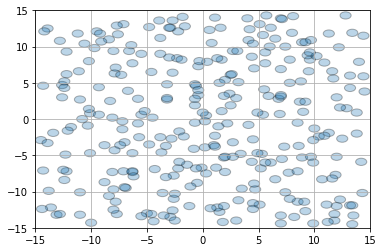

In [53]:
N = 300

disks = generate_disks(N)
draw_disks(disks)

In [54]:
print(f"All in bound? {not check_if_all_in_bounds(disks)}")
print(f"Collisions amount: {check_for_collisions(disks)}")

All in bound? True
Collisions amount: 128.0


In [55]:
seperated = seperate_disks(disks)

All in bound? True
Collisions amount: 0


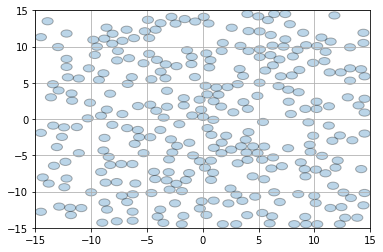

In [56]:
print(f"All in bound? {not check_if_all_in_bounds(seperated)}")
print(f"Collisions amount: {check_for_collisions(seperated)}")

draw_disks(seperated)